# Load data

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('ECE 143.csv')


In [71]:

df.set_index(["State"], inplace=True)

In [72]:
print(df)

                      EV Sales\n2015  EV Sales\n2016  EV Sales\n2017  \
State                                                                  
Alabama                          197             330             381   
Alaska                            61              94              85   
Arizona                         1658            2265            2976   
Arkansas                          76             138             187   
California                     61590           73854           94873   
Colorado                        1898            2711            4156   
Connecticut                     1015            1511            2304   
Delaware                         185             337             401   
District of Columbia             195             405             398   
Florida                         3841            6255            6573   
Georgia                         6829            2435            2427   
Hawaii                          1032            1224            

In [73]:
sale_4years = df.iloc[:,0:4]
sale_4years['State'] = sale_4years.index.get_level_values('State')
x=pd.melt(sale_4years,id_vars="State", var_name="years", value_name="sale")
y=x.groupby(["State","years"]).sum()
y['State'] = y.index.get_level_values('State')
y['years'] = y.index.get_level_values('years')
y.head()

sale    State           years
State   years                                        
Alabama EV Sales\n2015   197  Alabama  EV Sales\n2015
        EV Sales\n2016   330  Alabama  EV Sales\n2016
        EV Sales\n2017   381  Alabama  EV Sales\n2017
        EV Sales\n2018   866  Alabama  EV Sales\n2018
Alaska  EV Sales\n2015    61   Alaska  EV Sales\n2015

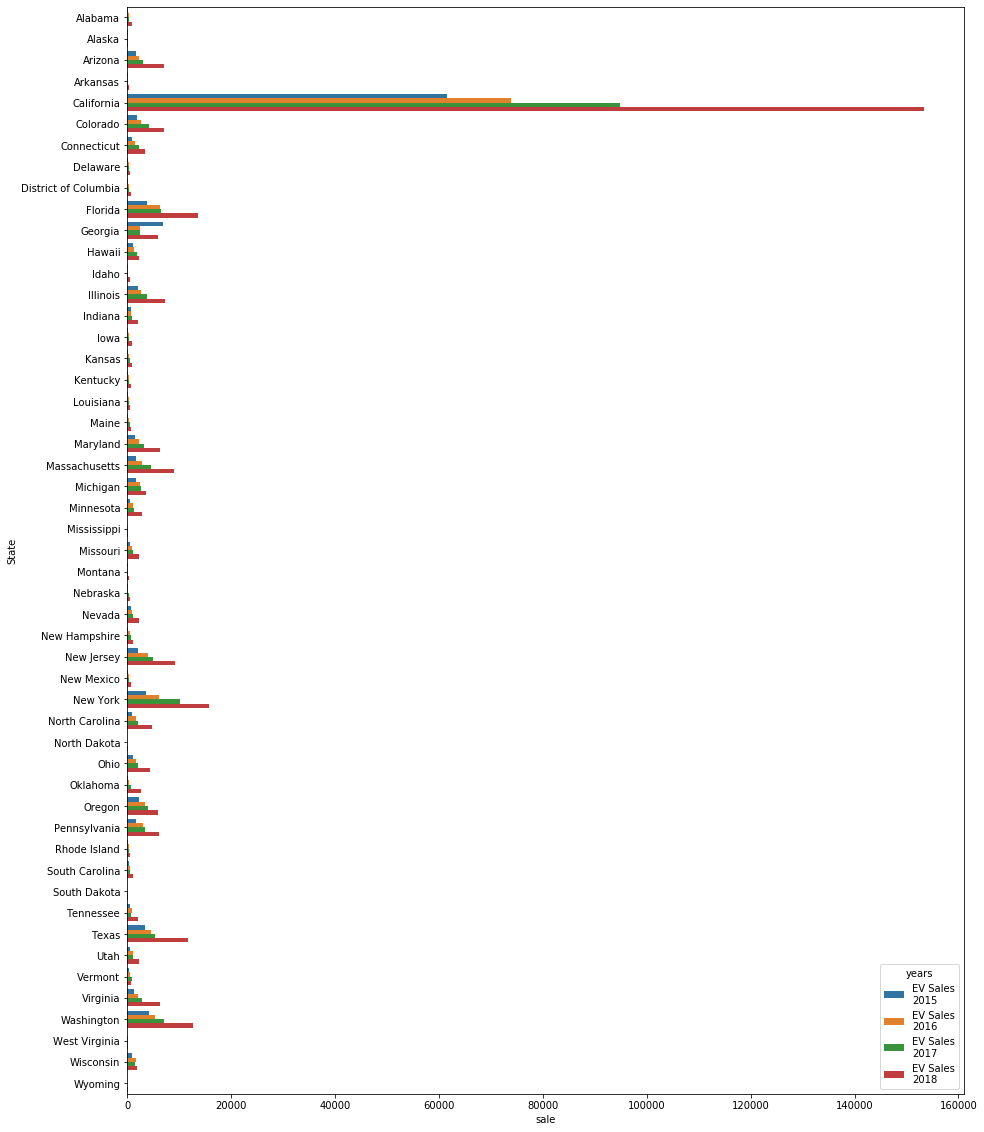

In [74]:
plt.figure(figsize=(15,20))
sns.barplot(x='sale', y='State', hue="years",data=y)

# Linear regression

In [75]:
from sklearn.linear_model import LinearRegression

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


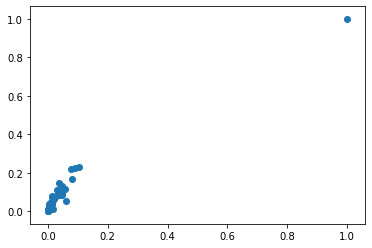

In [87]:
# pick 'charging locations' as an example
cla=df.iloc[:,[3,28]]

cla['Charging Locations'] = cla['Charging Locations'].astype(int)
# Data Normalization
cla=cla.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))

plt.scatter(cla.iloc[:,0],cla.iloc[:,1])


In [81]:
cla.corr()

,EV Sales 2018,Charging Locations
EV Sales\n2018,1.000000,0.965633
Charging Locations,0.965633,1.000000


In [95]:

lrModel = LinearRegression()
x = cla.iloc[:,0]
y = cla.iloc[:,1]
x = np.array(x).reshape((len(x), 1))
y = np.array(y).reshape((len(y), 1))
lrModel.fit(x,y)
lrModel.score(x,y)



0.932447772814718

# Random forest 

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
dx = pd.read_csv('ECE 143.csv')
# dx=dx.iloc[:,[4,13,14,15,16,17]]
dx=dx.iloc[:,[4,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
dx.columns = ['EV Sales in 2018', 'Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price','Avg gasoline price per gallon',
             'High school graduate or higher','Bachelors degree or higher','Advanced degree','Democratic Representation','Republican Representation',
             'Green Representation','Libertarian/ Independent Representation','Median Household Income','Tax Credit Program','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']


x, y = dx.iloc[:, 1:].values, dx.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.nan_to_num(x_train)
np.nan_to_num(x_test)
np.nan_to_num(y_train)
np.nan_to_num(y_test)
feat_labels = dx.columns[1:]

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

importance： [0.05004513 0.05035401 0.04940376 0.05322673 0.05542079 0.05096607
 0.05292441 0.04830873 0.04980092 0.04929704 0.04807004 0.04843841
 0.04430483 0.04886285 0.04832332 0.01231763 0.04525903 0.04392398
 0.05599477 0.04368393 0.05107364]
 1) Outlets Per Location           0.055995
 2) BRIDGE QUALITY                 0.055421
 3) ROAD QUALITY                   0.053227
 4) Avg gasoline price per gallon  0.052924
 5) EVs to Charging Outlets        0.051074
 6) Average retail price           0.050966
 7) COMMUTE TIME                   0.050354
 8) Avg/C                          0.050045
 9) Bachelors degree or higher     0.049801
10) PUBLIC TRANSIT USAGE           0.049404
11) Advanced degree                0.049297
12) Libertarian/ Independent Representation 0.048863
13) Republican Representation      0.048438
14) Median Household Income        0.048323
15) High school graduate or higher 0.048309
16) Democratic Representation      0.048070
17) Charging Locations             0.04

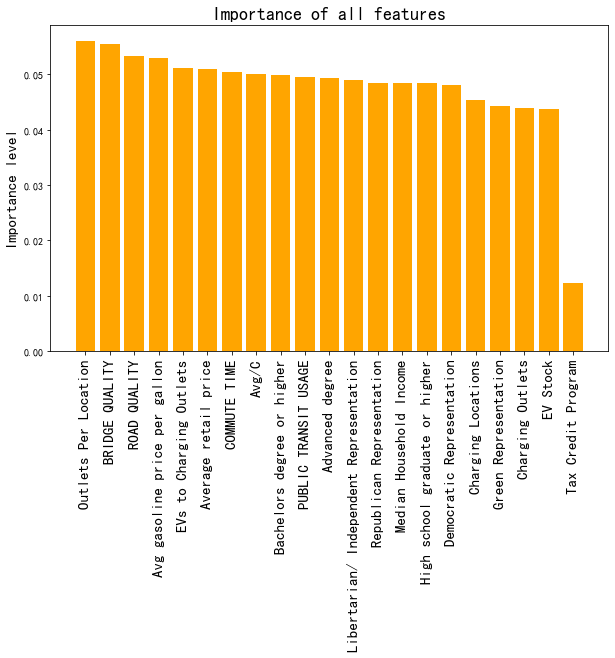

In [191]:
importances = forest.feature_importances_
print("importance：", importances)

x_columns = dx.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])
plt.figure(figsize=(10, 6))
plt.title("Importance of all features", fontsize=18)
plt.ylabel("Importance level", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()

In [75]:
df.corr()

,EV Sales 2015,EV Sales 2016,EV Sales 2017,EV Sales 2018,Avg/F,Avg/C,COMMUTE TIME,PUBLIC TRANSIT USAGE,ROAD QUALITY,BRIDGE QUALITY,Average retail price (cents/kWh),Outlets Per Location,EVs to Charging Outlets
EV Sales\n2015,1.000000,0.995757,0.994309,0.994262,0.162030,0.161657,0.295434,-0.240331,0.215137,-0.131054,0.193698,0.368996,0.365721
EV Sales\n2016,0.995757,1.000000,0.999326,0.998902,0.148864,0.148436,0.303579,-0.262773,0.238393,-0.122333,0.200879,0.359195,0.377863
EV Sales\n2017,0.994309,0.999326,1.000000,0.999171,0.140393,0.139913,0.310860,-0.270082,0.245970,-0.114223,0.211262,0.357837,0.379890
EV Sales\n2018,0.994262,0.998902,0.999171,1.000000,0.158290,0.157769,0.325029,-0.279093,0.241914,-0.130303,0.199032,0.363027,0.387470
Avg/F,0.162030,0.148864,0.140393,0.158290,1.000000,0.999985,0.390021,-0.028316,0.064190,-0.298905,-0.085608,0.268778,0.011132
Avg/C,0.161657,0.148436,0.139913,0.157769,0.999985,1.000000,0.389343,-0.027287,0.064531,-0.298626,-0.085530,0.267959,0.010364
COMMUTE TIME,0.295434,0.303579,0.310860,0.325029,0.390021,0.389343,1.000000,-0.719571,0.325983,-0.275906,0.314216,0.105016,0.423806
PUBLIC TRANSIT USAGE,-0.240331,-0.262773,-0.270082,-0.279093,-0.028316,-0.027287,-0.719571,1.000000,-0.273854,0.418968,-0.350918,-0.150619,-0.518651
ROAD QUALITY,0.215137,0.238393,0.245970,0.241914,0.064190,0.064531,0.325983,-0.273854,1.000000,0.159664,0.436997,0.105727,0.395297
BRIDGE QUALITY,-0.131054,-0.122333,-0.114223,-0.130303,-0.298905,-0.298626,-0.275906,0.418968,0.159664,1.000000,0.055117,-0.189319,-0.086466
